In [85]:
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn.ensemble import RandomForestClassifier
from sklearn import svm

from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation
from sklearn.model_selection import cross_val_score
from pandas.plotting._matplotlib import converter
converter.register()
import seaborn as sb
from matplotlib import pyplot as plt
import seaborn as sb
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

In [86]:
df=pd.DataFrame(pd.read_csv("C:/Users/Debjyoti/Desktop/dataset2/Ecommerce_Customers.csv"))

In [87]:
print(df.columns)

Index(['Address', 'Avatar', 'Avg. Session Length', 'Time on App',
       'Time on Website', 'Length of Membership', 'Yearly Amount Spent'],
      dtype='object')


In [88]:
df.drop(df.columns[[0,1]], axis=1, inplace=True)
df.head()

,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
0,34.497268,12.655651,39.577668,4.082621,587.951054
1,31.926272,11.109461,37.268959,2.664034,392.204933
2,33.000915,11.330278,37.110597,4.104543,487.547505
3,34.305557,13.717514,36.721283,3.120179,581.852344
4,33.330673,12.795189,37.536653,4.446308,599.406092


In [89]:
print(df.shape)

(500, 5)


In [90]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 5 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Avg. Session Length   500 non-null    float64
 1   Time on App           500 non-null    float64
 2   Time on Website       500 non-null    float64
 3   Length of Membership  500 non-null    float64
 4   Yearly Amount Spent   500 non-null    float64
dtypes: float64(5)
memory usage: 19.7 KB


In [91]:
print(df.head())

   Avg. Session Length  Time on App  Time on Website  Length of Membership  \
0            34.497268    12.655651        39.577668              4.082621   
1            31.926272    11.109461        37.268959              2.664034   
2            33.000915    11.330278        37.110597              4.104543   
3            34.305557    13.717514        36.721283              3.120179   
4            33.330673    12.795189        37.536653              4.446308   

   Yearly Amount Spent  
0           587.951054  
1           392.204933  
2           487.547505  
3           581.852344  
4           599.406092  


<AxesSubplot:xlabel='Percent missing', ylabel='Feature'>

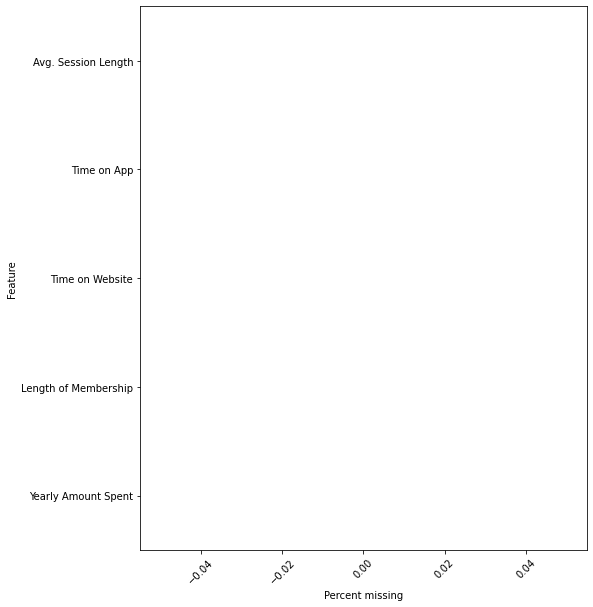

In [92]:
'''Calculate percentage null values for each column or feature'''
null_vals = df.isnull().sum()/len(df)*100
null_vals = pd.DataFrame(null_vals)
null_vals.reset_index(inplace = True)
null_vals.columns = ["Feature","Percent missing"]
plt.figure(figsize = (8,10))
plt.xticks(rotation=45)
sns.barplot(x = "Percent missing",y ="Feature",data = null_vals,orient = "h")

In [93]:
X_train, X_test, Y_train, Y_test = train_test_split(X_sample, y_sample, test_size=0.2, random_state=1) # 80% training and 20% test



C:\Users\Debjyoti\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Debjyoti\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Debjyoti\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an

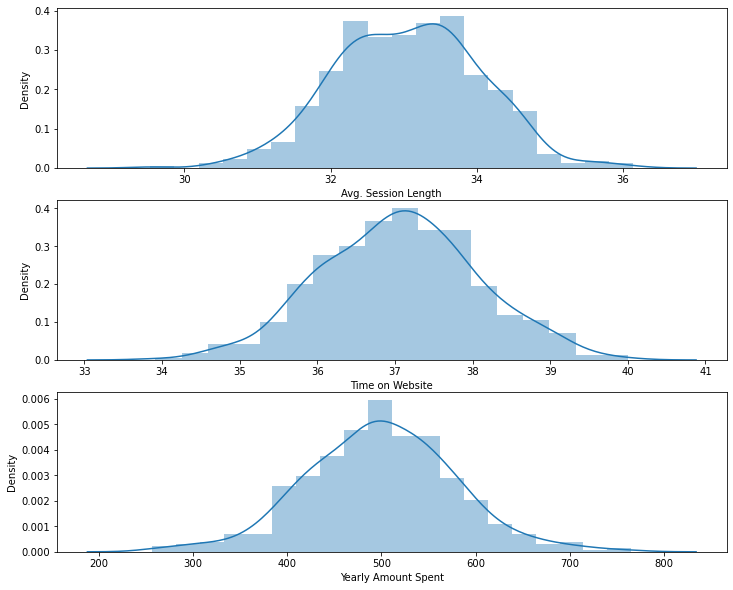

In [94]:
# Plot RFM distributions
plt.figure(figsize=(12,10))
# Plot distribution of R
plt.subplot(3, 1, 1); sns.distplot(df['Avg. Session Length'])
# Plot distribution of F
plt.subplot(3, 1, 2); sns.distplot(df['Time on Website'])
# Plot distribution of M
plt.subplot(3, 1, 3); sns.distplot(df['Yearly Amount Spent'])
# Show the plot
plt.show()

In [80]:
'''Do scaling to make sure all dimensions have equal mean and variance'''
scaler = StandardScaler() 
scaler.fit(df)
df = pd.DataFrame(scaler.transform(df))
df.columns = df.columns
df.describe()

,0,1,2,3,4
count,5.000000e+02,5.000000e+02,5.000000e+02,5.000000e+02,5.000000e+02
mean,-7.585710e-15,5.816458e-16,-4.035883e-15,-2.420286e-16,-3.158515e-16
std,1.001002e+00,1.001002e+00,1.001002e+00,1.001002e+00,1.001002e+00
min,-3.550697e+00,-3.568527e+00,-3.117055e+00,-3.269191e+00,-3.062310e+00
25%,-7.174193e-01,-6.688689e-01,-7.045108e-01,-6.040522e-01,-6.849936e-01
50%,2.905905e-02,-6.972938e-02,8.837404e-03,5.143339e-04,-5.378438e-03
75%,6.643923e-01,7.061488e-01,6.498278e-01,5.940635e-01,6.310282e-01
max,3.112709e+00,3.095491e+00,2.917088e+00,3.395075e+00,3.359664e+00


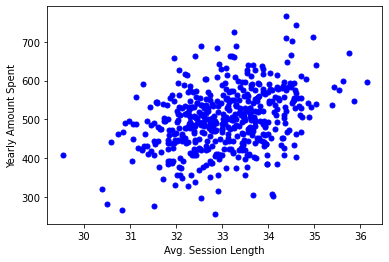

In [95]:
#Visualise data points
plt.scatter(df["Avg. Session Length"],df["Yearly Amount Spent"],c='blue',s=25)
plt.xlabel('Avg. Session Length')
plt.ylabel('Yearly Amount Spent')
plt.show()

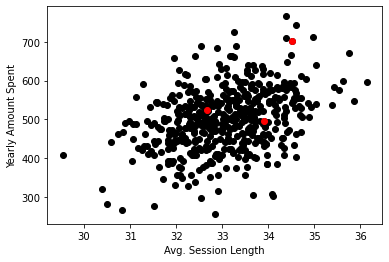

In [96]:
# Step 1 and 2 - Choose the number of clusters (k) and select random centroid for each cluster

#number of clusters
K=3

# Select random observation as centroids
Centroids = (df.sample(n=K))
plt.scatter(df["Avg. Session Length"],df["Yearly Amount Spent"],c='black')
plt.scatter(Centroids["Avg. Session Length"],Centroids["Yearly Amount Spent"],c='red')
plt.xlabel('Avg. Session Length')
plt.ylabel('Yearly Amount Spent')
plt.show()

In [97]:
# Step 3 - Assign all the points to the closest cluster centroid
# Step 4 - Recompute centroids of newly formed clusters
# Step 5 - Repeat step 3 and 4

diff = 1
j=0

while(diff!=0):
    XD=df
    i=1
    for index1,row_c in Centroids.iterrows():
        ED=[]
        for index2,row_d in XD.iterrows():
            d1=(row_c["Length of Membership"]-row_d["Length of Membership"])**2
            d2=(row_c["Avg. Session Length"]-row_d["Avg. Session Length"])**2
            d3=(row_c["Yearly Amount Spent"]-row_d["Yearly Amount Spent"])**2
            d=np.sqrt(d1+d2+d3)
            ED.append(d)
        df[i]=ED
        i=i+1

    C=[]
    for index,row in df.iterrows():
        min_dist=row[1]
        pos=1
        for i in range(K):
            if row[i+1] < min_dist:
                min_dist = row[i+1]
                pos=i+1
        C.append(pos)
    df["Cluster"]=C
    Centroids_new = df.groupby(["Cluster"]).mean()[["Length of Membership","Avg. Session Length","Yearly Amount Spent"]]
    if j == 0:
        diff=1
        j=j+1
    else:
        diff = (Centroids_new['Length of Membership'] - Centroids['Length of Membership']).sum()
        + (Centroids_new['Avg. Session Length'] - Centroids['Avg. Session Length']).sum() 
        + (Centroids_new['Yearly Amount Spent'] - Centroids['Yearly Amount Spent']).sum()
        print(diff.sum())
    Centroids = df.groupby(["Cluster"]).mean()[["Length of Membership","Avg. Session Length","Yearly Amount Spent"]]

-0.24303207461842602
-0.19290466025335906
-0.1676345355537867
-0.1670005669094743
-0.1983824105888634
-0.1485838681155598
-0.08174021685139676
-0.05383983605240772
-0.04619960417540181
-0.02007229170441427
-0.01846207760240537
-0.019012896182891037
-0.021454371832970498
-0.0032792711330746904
-0.011216645045564189
-0.00332426293122845
-0.012345150133557858
-0.0028966145763624773
-0.014753776106612548
-0.006097877072487989
0.0


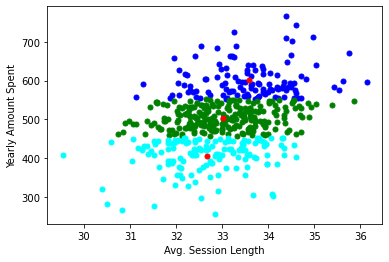

In [46]:
# visualizing the clusters formed after training
color=['blue','green','cyan']
for k in range(K):
    data1=df[df["Cluster"]==k+1]
    plt.scatter(data1["Avg. Session Length"],data1["Yearly Amount Spent"],c=color[k],s=25)
plt.scatter(Centroids["Avg. Session Length"],Centroids["Yearly Amount Spent"],c='red',s=25)
plt.xlabel('Avg. Session Length')
plt.ylabel('Yearly Amount Spent')
plt.show()

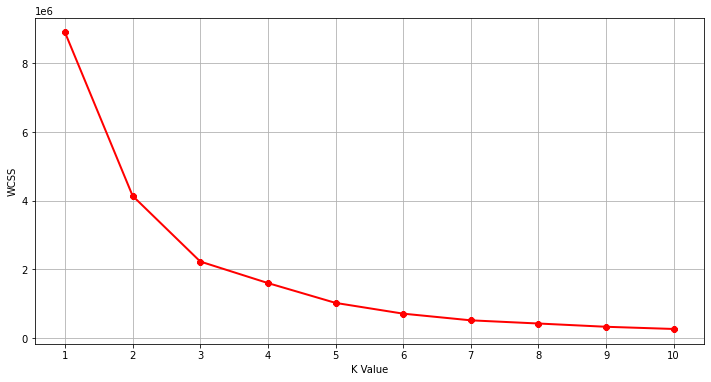

In [98]:
from sklearn.cluster import KMeans
wcss = []
for k in range(1,11):
    kmeans = KMeans(n_clusters=k, init="k-means++")
    kmeans.fit(df.iloc[:,1:])
    wcss.append(kmeans.inertia_)
plt.figure(figsize=(12,6))    
plt.grid()
plt.plot(range(1,11),wcss, linewidth=2, color="red", marker ="8")
plt.xlabel("K Value")
plt.xticks(np.arange(1,11,1))
plt.ylabel("WCSS")
plt.show()

In [57]:
print('Nan checking',np.where(pd.isnull(df)))


Nan checking (array([], dtype=int64), array([], dtype=int64))


In [58]:
customer_status = []


In [59]:
for index, row in df.iterrows():
     if row.__getitem__('Avg. Session Length') > 30 and  row.__getitem__('Yearly Amount Spent') > 500 :
          customer_status.append('Royal')
     else :
          customer_status.append('Normal')


In [60]:
df['Customer_Status'] = customer_status
df.to_csv('Ecommerce_customer_latest.csv')
df=pd.DataFrame(pd.read_csv("Ecommerce_customer_latest.csv"))


In [61]:
y_sample = df["Customer_Status"]
X_sample = df[['Avg. Session Length','Time on Website', 'Length of Membership', 'Yearly Amount Spent']]
print(df)

     Unnamed: 0  Avg. Session Length  Time on App  Time on Website  \
0             0            34.497268    12.655651        39.577668   
1             1            31.926272    11.109461        37.268959   
2             2            33.000915    11.330278        37.110597   
3             3            34.305557    13.717514        36.721283   
4             4            33.330673    12.795189        37.536653   
..          ...                  ...          ...              ...   
495         495            33.237660    13.566160        36.417985   
496         496            34.702529    11.695736        37.190268   
497         497            32.646777    11.499409        38.332576   
498         498            33.322501    12.391423        36.840086   
499         499            33.715981    12.418808        35.771016   

     Length of Membership  Yearly Amount Spent Customer_Status  
0                4.082621           587.951054           Royal  
1                2.664034    

In [ ]:
'''Get cluster characteristics. Since we are interested in the original values,
we use the non-log transformed, non-standardized dataframe'''

df_clus2 = df.assign(Cluster = clus_labels)
print(df_clus2.shape)
df_clus2.head(2)

In [13]:
clf = DecisionTreeClassifier(criterion='entropy', max_depth=3)
clf = clf.fit(X_train,Y_train)
print(clf)

DecisionTreeClassifier(criterion='entropy', max_depth=3)


In [14]:
Y_pred = clf.predict(X_test)
print(Y_pred)

['Normal' 'Royal' 'Royal' 'Normal' 'Normal' 'Royal' 'Normal' 'Normal'
 'Royal' 'Normal' 'Normal' 'Royal' 'Royal' 'Royal' 'Royal' 'Normal'
 'Normal' 'Normal' 'Normal' 'Normal' 'Normal' 'Normal' 'Royal' 'Normal'
 'Royal' 'Normal' 'Royal' 'Normal' 'Normal' 'Royal' 'Royal' 'Normal'
 'Normal' 'Normal' 'Normal' 'Royal' 'Royal' 'Royal' 'Royal' 'Normal'
 'Royal' 'Royal' 'Normal' 'Royal' 'Normal' 'Normal' 'Normal' 'Royal'
 'Normal' 'Normal' 'Royal' 'Normal' 'Royal' 'Normal' 'Normal' 'Royal'
 'Normal' 'Normal' 'Normal' 'Royal' 'Royal' 'Royal' 'Royal' 'Royal'
 'Normal' 'Royal' 'Royal' 'Normal' 'Normal' 'Royal' 'Normal' 'Royal'
 'Normal' 'Royal' 'Normal' 'Normal' 'Royal' 'Royal' 'Royal' 'Normal'
 'Royal' 'Royal' 'Royal' 'Normal' 'Royal' 'Royal' 'Normal' 'Normal'
 'Royal' 'Normal' 'Normal' 'Royal' 'Normal' 'Royal' 'Royal' 'Royal'
 'Royal' 'Royal' 'Royal' 'Normal']


In [15]:
print("Confusion matrix: ",metrics.confusion_matrix(Y_test, Y_pred)) # Model Accuracy, how often is the classifier correct?

Confusion matrix:  [[50  0]
 [ 0 50]]


In [16]:
print("Accuracy (Info Gain) :",metrics.accuracy_score(Y_test, Y_pred))

Accuracy (Info Gain) : 1.0


In [17]:
precision=metrics.precision_score(Y_test, Y_pred,labels=[1],average='micro')
recall=metrics.recall_score(Y_test, Y_pred,labels=[1],average='micro')
f1score=metrics.f1_score(Y_test, Y_pred, labels=[1],average='micro')
print("Precision (Info Gain):",precision)
print("Recall (Info Gain):",recall)
print("F1Score (Info Gain):",f1score)


Precision (Info Gain): 0.0
Recall (Info Gain): 0.0
F1Score (Info Gain): 0.0


C:\Users\Debjyoti\anaconda3\lib\site-packages\numpy\lib\arraysetops.py:576: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask &= (ar1 != a)
C:\Users\Debjyoti\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Debjyoti\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Debjyoti\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1464: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no true nor predicted samples

In [18]:
#default == gini index # no gain ratio
clf = DecisionTreeClassifier(max_depth=3)
clf = clf.fit(X_train,Y_train)
print(clf)

DecisionTreeClassifier(max_depth=3)


In [19]:
Y_pred = clf.predict(X_test)
print(Y_pred)

['Normal' 'Royal' 'Royal' 'Normal' 'Normal' 'Royal' 'Normal' 'Normal'
 'Royal' 'Normal' 'Normal' 'Royal' 'Royal' 'Royal' 'Royal' 'Normal'
 'Normal' 'Normal' 'Normal' 'Normal' 'Normal' 'Normal' 'Royal' 'Normal'
 'Royal' 'Normal' 'Royal' 'Normal' 'Normal' 'Royal' 'Royal' 'Normal'
 'Normal' 'Normal' 'Normal' 'Royal' 'Royal' 'Royal' 'Royal' 'Normal'
 'Royal' 'Royal' 'Normal' 'Royal' 'Normal' 'Normal' 'Normal' 'Royal'
 'Normal' 'Normal' 'Royal' 'Normal' 'Royal' 'Normal' 'Normal' 'Royal'
 'Normal' 'Normal' 'Normal' 'Royal' 'Royal' 'Royal' 'Royal' 'Royal'
 'Normal' 'Royal' 'Royal' 'Normal' 'Normal' 'Royal' 'Normal' 'Royal'
 'Normal' 'Royal' 'Normal' 'Normal' 'Royal' 'Royal' 'Royal' 'Normal'
 'Royal' 'Royal' 'Royal' 'Normal' 'Royal' 'Royal' 'Normal' 'Normal'
 'Royal' 'Normal' 'Normal' 'Royal' 'Normal' 'Royal' 'Royal' 'Royal'
 'Royal' 'Royal' 'Royal' 'Normal']


In [20]:
print("Confusion matrix: ",metrics.confusion_matrix(Y_test, Y_pred))
# Model Accuracy, how often is the classifier correct?

Confusion matrix:  [[50  0]
 [ 0 50]]


In [21]:
print("Accuracy: gini index ",metrics.accuracy_score(Y_test, Y_pred))

Accuracy: gini index  1.0


In [22]:
precision=metrics.precision_score(Y_test, Y_pred,labels=[1],average='micro')
recall=metrics.recall_score(Y_test, Y_pred,labels=[1],average='micro')
f1score=metrics.f1_score(Y_test, Y_pred, labels=[1],average='micro')
print("Precision: gini index ",precision)
print("Recall: gini index ",recall)
print("F1Score gini index :",f1score)

Precision: gini index  0.0
Recall: gini index  0.0
F1Score gini index : 0.0


C:\Users\Debjyoti\anaconda3\lib\site-packages\numpy\lib\arraysetops.py:576: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask &= (ar1 != a)
C:\Users\Debjyoti\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Debjyoti\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Debjyoti\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1464: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no true nor predicted samples

In [23]:
clf = RandomForestClassifier(n_estimators = 10, max_depth = 3)
clf = clf.fit(X_train,Y_train)
print(clf)

RandomForestClassifier(max_depth=3, n_estimators=10)


In [24]:
Y_pred = clf.predict(X_test)
print(Y_pred)

['Normal' 'Royal' 'Royal' 'Normal' 'Normal' 'Royal' 'Normal' 'Normal'
 'Royal' 'Normal' 'Normal' 'Royal' 'Royal' 'Royal' 'Royal' 'Normal'
 'Normal' 'Normal' 'Normal' 'Normal' 'Normal' 'Normal' 'Royal' 'Normal'
 'Royal' 'Normal' 'Royal' 'Normal' 'Normal' 'Royal' 'Royal' 'Normal'
 'Normal' 'Normal' 'Normal' 'Royal' 'Royal' 'Royal' 'Royal' 'Normal'
 'Royal' 'Royal' 'Normal' 'Royal' 'Normal' 'Normal' 'Normal' 'Royal'
 'Normal' 'Normal' 'Royal' 'Normal' 'Royal' 'Normal' 'Normal' 'Royal'
 'Normal' 'Normal' 'Normal' 'Royal' 'Royal' 'Royal' 'Royal' 'Royal'
 'Normal' 'Royal' 'Royal' 'Normal' 'Normal' 'Royal' 'Normal' 'Royal'
 'Normal' 'Royal' 'Normal' 'Normal' 'Royal' 'Royal' 'Royal' 'Normal'
 'Royal' 'Royal' 'Royal' 'Normal' 'Royal' 'Royal' 'Normal' 'Normal'
 'Royal' 'Normal' 'Normal' 'Royal' 'Normal' 'Royal' 'Royal' 'Royal'
 'Royal' 'Royal' 'Royal' 'Normal']


In [25]:
print("Confusion matrix: ",metrics.confusion_matrix(Y_test, Y_pred))
# Model Accuracy, how often is the classifier correct?

Confusion matrix:  [[50  0]
 [ 0 50]]


In [26]:
print("Accuracy:forest ",metrics.accuracy_score(Y_test, Y_pred))

Accuracy:forest  1.0


In [28]:
precision=metrics.precision_score(Y_test, Y_pred,labels=[3],average='micro')
recall=metrics.recall_score(Y_test, Y_pred,labels=[3],average='micro')
f1score=metrics.f1_score(Y_test, Y_pred, labels=[3],average='micro')
print("Precision: forest ",precision)
print("Recall: forest ",recall)
print("F1Score forest :",f1score)


Precision: forest  0.0
Recall: forest  0.0
F1Score forest : 0.0


In [29]:
clf = svm.SVC()
clf = clf.fit(X_train,Y_train)
print(clf)

SVC()


In [30]:
Y_pred = clf.predict(X_test)
print(Y_pred)

['Normal' 'Normal' 'Royal' 'Normal' 'Normal' 'Royal' 'Normal' 'Normal'
 'Royal' 'Normal' 'Normal' 'Royal' 'Royal' 'Royal' 'Royal' 'Normal'
 'Normal' 'Normal' 'Normal' 'Normal' 'Normal' 'Normal' 'Royal' 'Normal'
 'Royal' 'Normal' 'Royal' 'Normal' 'Normal' 'Royal' 'Normal' 'Normal'
 'Normal' 'Normal' 'Normal' 'Royal' 'Royal' 'Royal' 'Royal' 'Normal'
 'Royal' 'Royal' 'Normal' 'Royal' 'Normal' 'Normal' 'Normal' 'Royal'
 'Normal' 'Normal' 'Royal' 'Normal' 'Royal' 'Normal' 'Normal' 'Royal'
 'Normal' 'Normal' 'Normal' 'Royal' 'Royal' 'Royal' 'Royal' 'Royal'
 'Normal' 'Royal' 'Royal' 'Normal' 'Normal' 'Royal' 'Normal' 'Royal'
 'Normal' 'Royal' 'Normal' 'Normal' 'Royal' 'Royal' 'Royal' 'Normal'
 'Royal' 'Royal' 'Royal' 'Normal' 'Royal' 'Royal' 'Normal' 'Normal'
 'Royal' 'Normal' 'Normal' 'Royal' 'Normal' 'Royal' 'Royal' 'Royal'
 'Royal' 'Royal' 'Royal' 'Normal']


In [31]:
print("Confusion matrix: ",metrics.confusion_matrix(Y_test, Y_pred))
# Model Accuracy, how often is the classifier correct?

Confusion matrix:  [[50  0]
 [ 2 48]]


In [32]:
print("Accuracy:svm ",metrics.accuracy_score(Y_test, Y_pred))

Accuracy:svm  0.98


In [33]:
precision=metrics.precision_score(Y_test, Y_pred,labels=[1],average='micro')
recall=metrics.recall_score(Y_test, Y_pred,labels=[1],average='micro')
f1score=metrics.f1_score(Y_test, Y_pred, labels=[1],average='micro')
print("Precision: svm ",precision)
print("Recall: svm ",recall)
print("F1Score svm :",f1score)


Precision: svm  0.0
Recall: svm  0.0
F1Score svm : 0.0


C:\Users\Debjyoti\anaconda3\lib\site-packages\numpy\lib\arraysetops.py:576: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask &= (ar1 != a)
C:\Users\Debjyoti\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Debjyoti\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Debjyoti\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1464: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no true nor predicted samples